<a href="https://colab.research.google.com/github/Stella-kimani/S.Kimani-Supervised-Learning-Naives-KNN/blob/master/Stella_Kimani_KNearest_NeighborsClassifier_Independent_project_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Use KNearest Neighbours algorithm to determine if a passenger aboard the Titanic survived  or not.

### b) Defining the Metric for Success


The model will be considered successful  it is able to have an accuracy score of at least 80%.

### c) Understanding the context 

Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. In this project, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the KNN classifier to predict which passengers survived this tragedy.

The data has been split into two groups:

Training set (train.csv)
Test set(test.csv)
The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.

The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.


Lets describe whats the meaning of the features given the both train & test datasets.

Variable Definition Key.

Survival

0= No

1= Yes

pclass (Ticket class)

1=1st

2=2nd

3=3rd

sex

age : Age of a person

sibsp (# of siblings / spouses aboard the Titanic)

parch (# of parents / children aboard the Titanic)

tickets

fare

cabin

embarked Port of Embarkation.

C = Cherbourg,

Q = Queenstown,

S = Southampton

pclass: A proxy for socio-economic status (SES

### d) Recording the Experimental Design


The following are the steps that we will take to conduct this project. They are listed below:

1.loading the required libraries

2.loading the data set

3.check the data

4.data preparation and cleaning

5.performing Exploratory Data Analysis (EDA)

6.Do any necessary encoding of data, Modelling 

7.train the models

8.make predictions using the  models

9.evaluate the performance of the models

11.Challenge the models.

11.draw conclusions


### e) Data Relevance

We are given the train and test data. The training set is used to build our machine learning models. For the training set, we are provided the outcome for each passenger. Our model will be based on “features” like passengers’ gender and class.

The test set is used to see how well our model performs on unseen data. For the test set, we are not provided the ground truth for each passenger. It is our job to predict these outcomes. For each passenger in the test set, use the model we trained to predict whether or not they survived the sinking of the Titanic.

## 2. Reading the Data

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Loading the Data from the source i.e. csv
# ---
train = pd.read_csv('/content/train.csv', index_col = 'PassengerId')
test = pd.read_csv('/content/test.csv', index_col = 'PassengerId')



## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
train.shape
test.shape
display('Train dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
display('Test dataset has {} rows with {} columns'.format(test.shape[0], test.shape[1]))

'Train dataset has 891 rows and 11 columns'

'Test dataset has 418 rows with 10 columns'

In [ ]:
# Previewing the top of train dataset
#
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#previewing the top of test dataset
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of train dataset
# 
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#previewing the bottom of test dataset
test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# Checking whether each column has an appropriate datatype
#
print(train.info())
print('\n')
print(test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       

In [ ]:
# checking the columns
print(train.columns)
print('\n')
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


The train dataset has an extra column Survived, one that is not on the test dataset.

In [7]:
train_unique = train.nunique().to_frame().reset_index()
train_unique.columns = ['Variable','DistinctCount']
train_unique

,Variable,DistinctCount
0,Survived,2
1,Pclass,3
2,Name,891
3,Sex,2
4,Age,88
5,SibSp,7
6,Parch,7
7,Ticket,681
8,Fare,248
9,Cabin,147


Having a look at all the number of unique entries in each column. 

In [ ]:
test_unique = test.nunique().to_frame().reset_index()
test_unique.columns = ['Variable','DistinctCount']
test_unique

,Variable,DistinctCount
0,Pclass,3
1,Name,418
2,Sex,2
3,Age,79
4,SibSp,7
5,Parch,8
6,Ticket,363
7,Fare,169
8,Cabin,76
9,Embarked,3


In [8]:
#checking for duplicated values
print(train.duplicated().sum())
print('\n')
print(test.duplicated().sum())

0


0


Both datasets have no duplicates

## 4. External Data Source Validation

This is a valid datasets and contains data from the actual titanic tragedy and has been used for various research purposes.More information can be found here.
. [Link](https://www.kaggle.com/c/titanic).

## 5. Tidying the Dataset

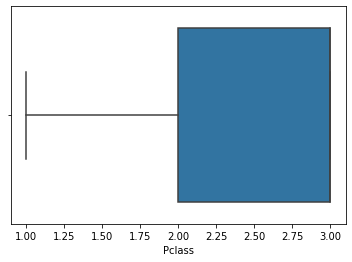

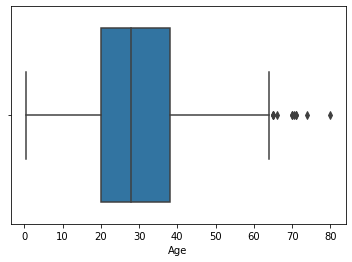

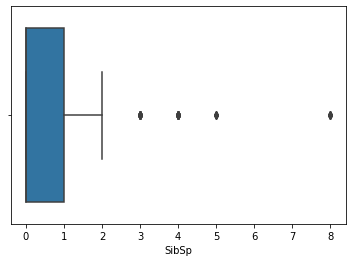

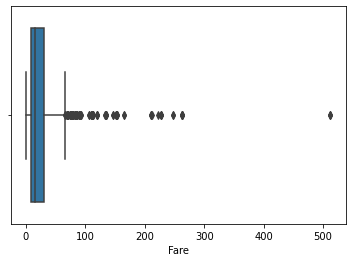

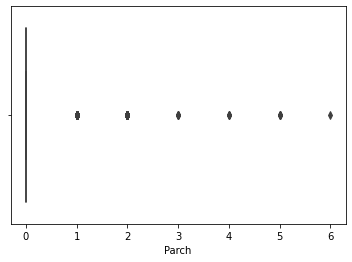

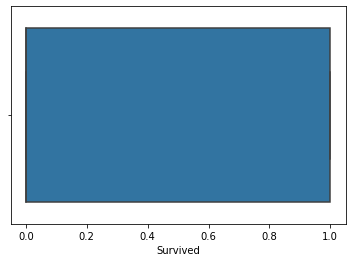

In [ ]:
# Checking for Outliers

cols = ['Pclass','Age','SibSp','Fare', 'Parch', 'Survived']

#fig, ax = plt.subplots(len(cols), figsize = (15, 40))

for col in cols:
  plt.figure()
  sns.boxplot(x=col, data=train)

  

The plots above show that there are outliers in each column except the Survived column and this makes sense since it is mainly 1 and 0 .
I will not drop any outlier since this is a predictive model.

In [ ]:
# Identifying the Missing Data
#
print(train.isnull().sum())
print('\n')
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [9]:
# Dealing with the Missing Data
#
#For the age column i will fill missing values with the median column
#train = train.fillna(train.Age.median())
#test = test.fillna(test.Age.meadian())
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True) 

This will fill the missing values in age column with mean age of passengers in both the datasets.The  median age is more suitable than mean.

In [10]:
# More data cleaning procedures
#Let me drop these columns which are not necessary in determining whether a person survived or not
#
train.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test.drop(columns = ['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

## 6. Exploratory Analysis

6.1Survival plots

In [ ]:
#Plotting the Univariate summaries
train.Survived.value_counts()/len(train)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [ ]:
train.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


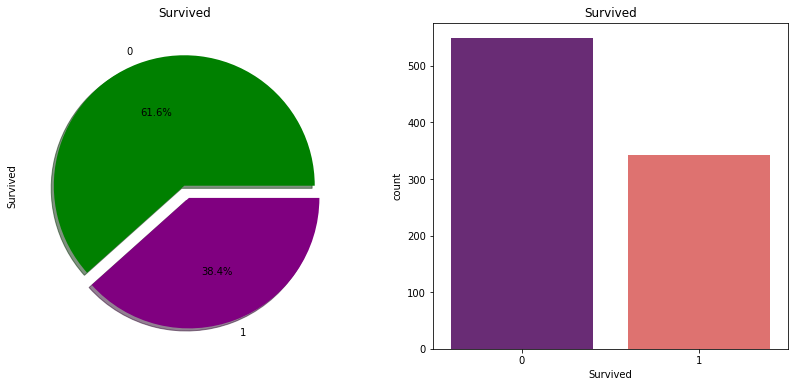

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
cols = ['Green','Purple']

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Survived')
plt.subplot(1,2,2)
sns.countplot('Survived',data=train,palette='magma')
plt.title('Survived')
plt.show()


From the plots above it shows that most people on board the titanic did not survive.Out of 891 people that were on board, only 350 people survived.I have also verified this information by looking at the value counts of the survived column.It means 61% of the passengers did not survive and 38% survived.

#6.2 Gender plots

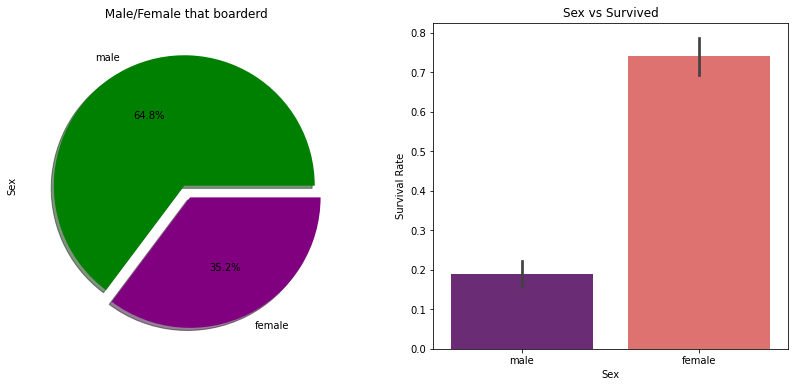

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
col = ['Green', 'Purple']
train['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=col)
plt.title(' Male/Female that boarderd')
plt.subplot(1,2,2)
sns.barplot(x="Sex", y="Survived", data=train,palette='magma')
plt.title('Sex vs Survived')
plt.ylabel("Survival Rate")
plt.show()


From the plots shown, it seems that more women survived and also from the pie chart it shows that more men were on board which was 64% and women at 35%.

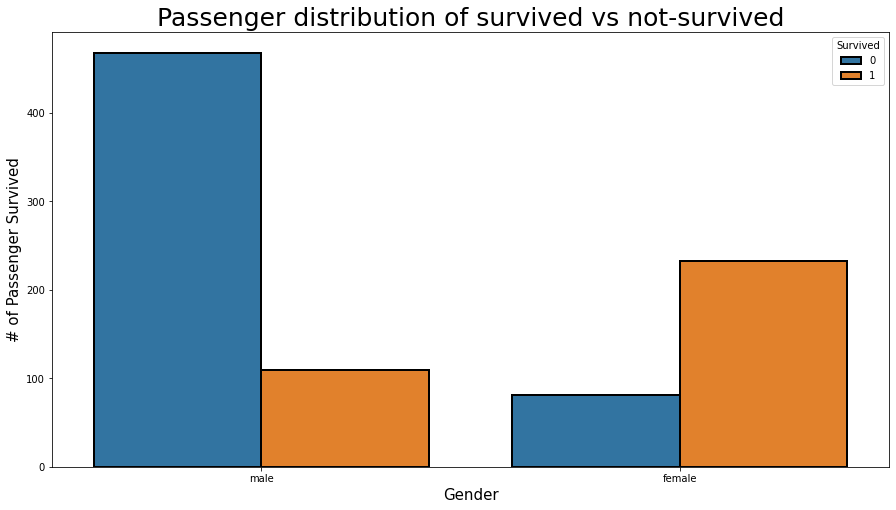

In [ ]:
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#

From this plot in terms of gender, more male died compared to female.
This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

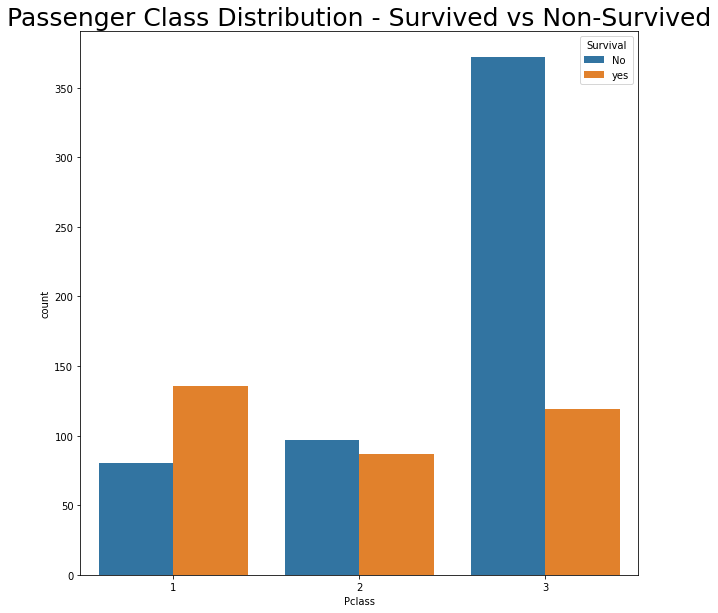

In [ ]:
#A plot of survival in the pclass column
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

In the 1st class more passengers survived from the count plot, in the 2nd class more people died that were in this class compared to those who survived. In the pClass 3 the highest number of passengers died as shown in the bar plot with blue color representing deceased people(did not survive)

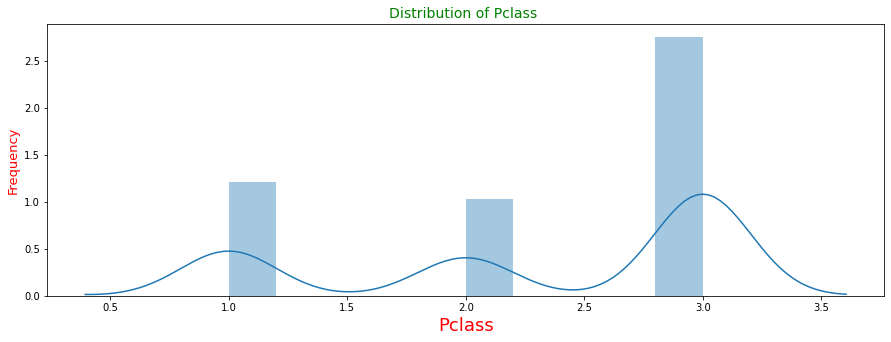

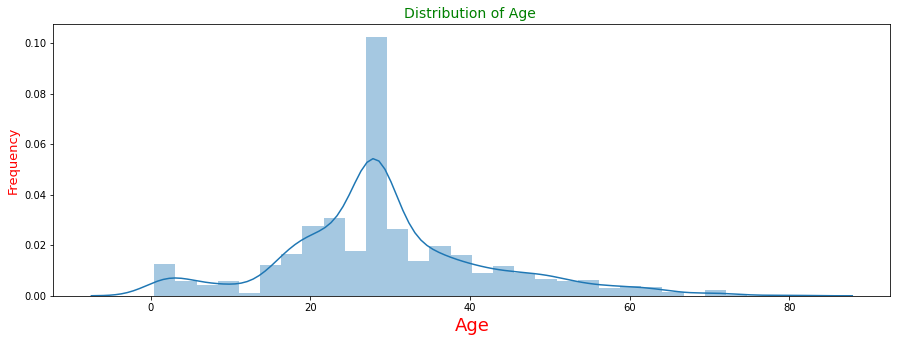

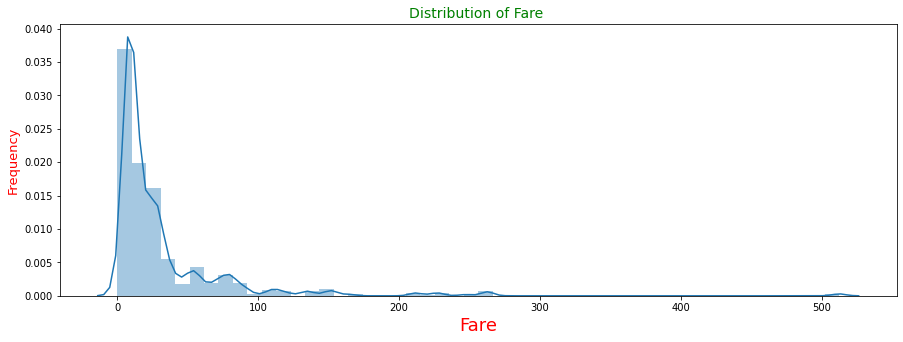

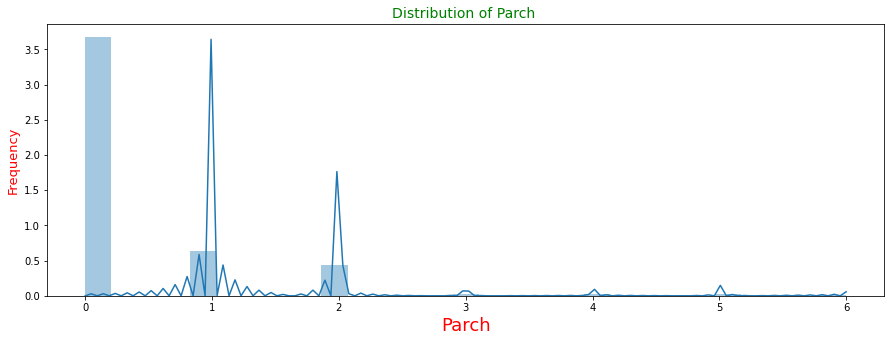

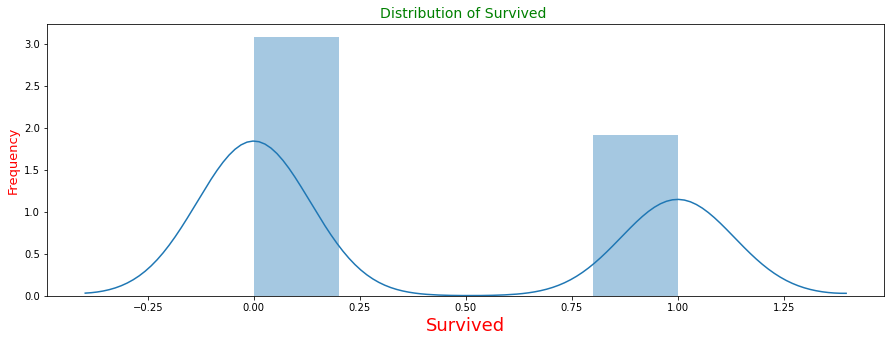

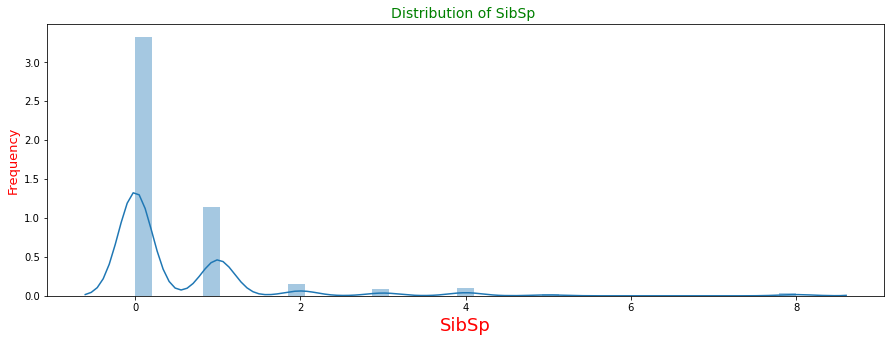

In [47]:
# get the numerical data 

cols = ['Pclass','Age','Fare', 'Parch', 'Survived', 'SibSp']
# loop to plot our distribution plots for our numerical data
for i in np.arange(0, 6, 1):
  plt.figure(figsize = (15, 5))
  sns.distplot(train[cols[i]])
  plt.title(f'Distribution of {cols[i]} ', fontsize = 14, color = "green")
  plt.xlabel(cols[i], fontsize = 18, color = 'red')
  plt.ylabel('Frequency', fontsize = 13, color = 'red')

We observe tha fare is skewed to the right,usually would be due to outliers. the  have a more bell shaped curve with tails on both ends. We need now to find the skewness of the data. 
Sibsp and Survived column are bimodal

In [55]:
# get the skewness of our data 
print(train.skew())

Survived      0.478523
Pclass       -0.630548
Age           0.510245
SibSp         3.695352
Parch         2.749117
Fare          4.787317
Embarked_Q    2.948778
Embarked_S   -0.997083
Sex_male     -0.618921
dtype: float64


We observe that our data is skewed to the right. This means that the median and mode is greater than the mean. 

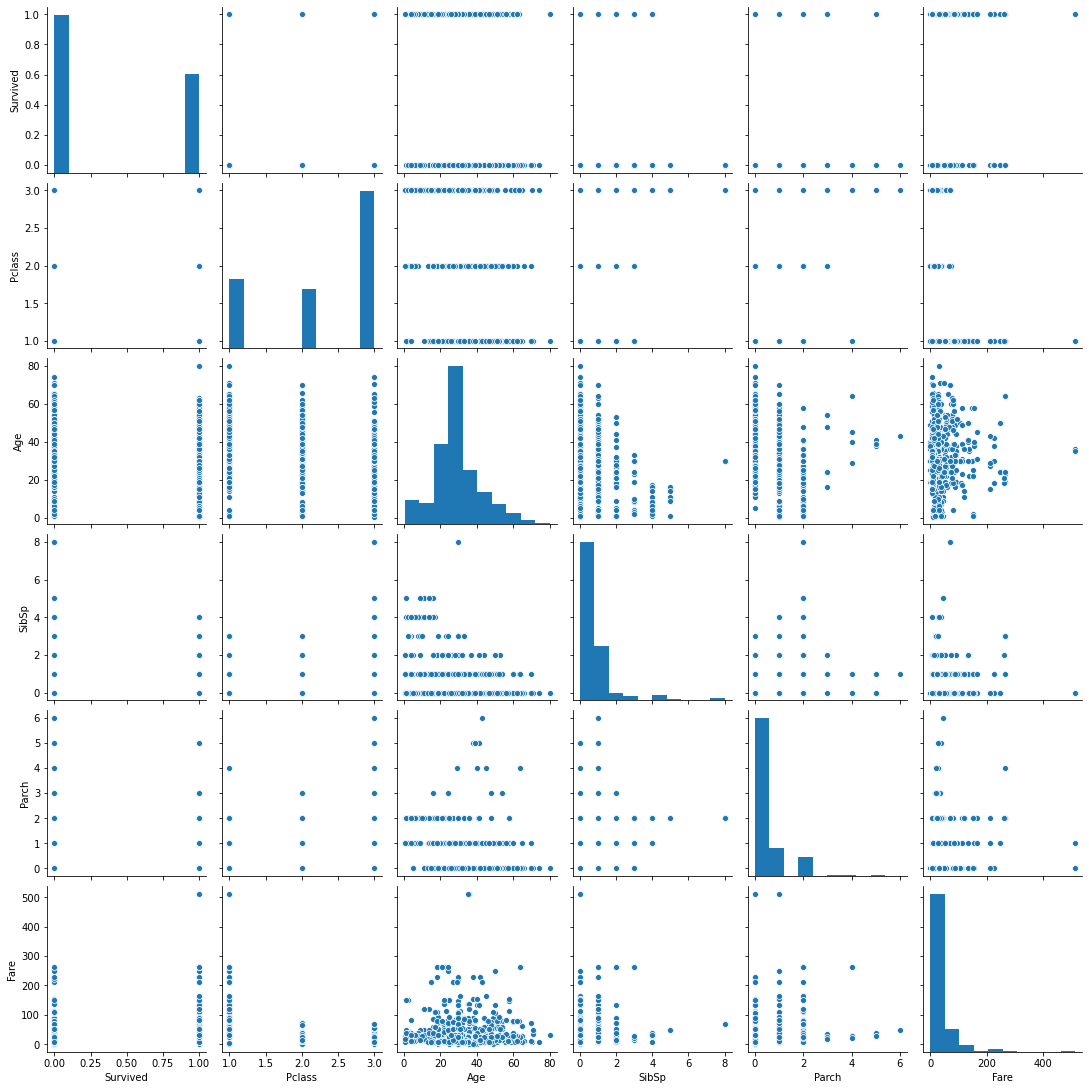

In [ ]:
# Ploting the bivariate summaries and recording our observations
#
# get the numerical data 

column = ['Pclass','Age','SibSp','Fare', 'Parch', 'Survived']
sns.pairplot(train)
plt.show()

In the survived plot, there are 2 bars displaying whether a person lived or died.Majority died that is why one bar is higher than the other.The plot for pclass shows three bars which represent 3 distinct entries, 1,2,3 class.Age scatter plot is positively skewed which shows that all entries in age column are positive.It also means that inthe age column there are outliers.
The scatter plot for age vs pclass is not linear and means that there is no direct linear relationship between the 2 columns.

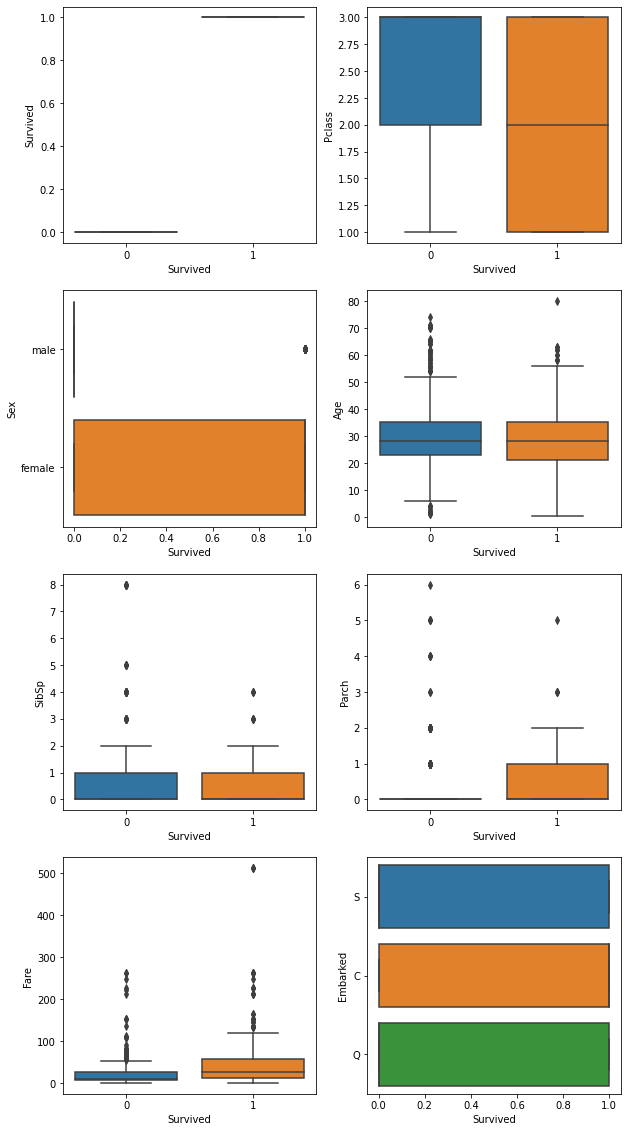

In [21]:
#This  relates the survived column with other independent variables.
columns = [ 'Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']

fig, ax = plt.subplots(4, 2, figsize=(10, 20))

for var, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x='Survived', y=var, data=train, ax=subplot)

The embarked column shows that the port of embarking doesnt really give any weight to a passengers survival rate.Looking at the plot for fare and survived,there are outliers and it seems the passengers who paid more money for their ticket were more likely to survive.It is not a strong relationship however.

#Checking for multicolinearity

In [24]:
# get the correlation
correlation = train.corr()
correlation
#correlation2 =test.corr()
#correlation2

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


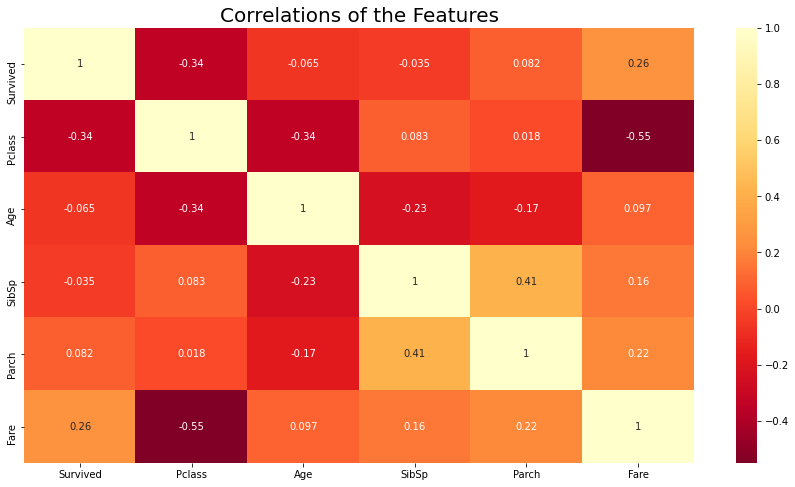

In [26]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="YlOrRd_r")
plt.title("Correlations of the Features", fontsize = 20);

Correlation is the degree to which two pairs are linearly related.

Positively Correlated Features:

Survived and fare: 0.257.
There is a positive correlation between Fare and Survival rate. The explanation is simple,the passenger who paid more money for their ticket were more likely to survive.It is not a strong relationship however.

Negatively Correlated Features:

Fare and Pclass: -0.55
This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3).



Below is our VIF matrix heat map



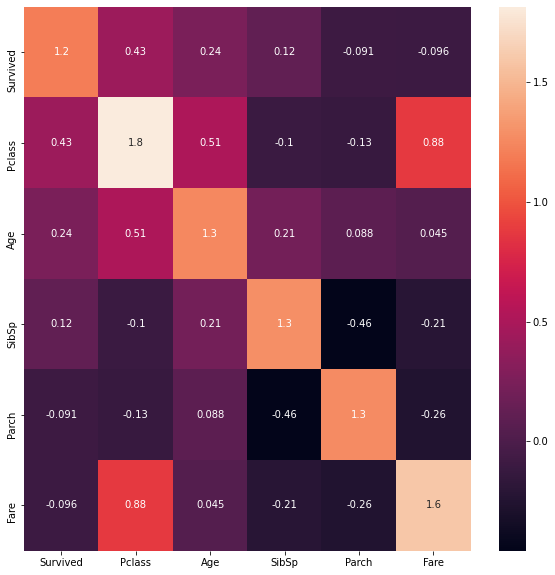

In [30]:
# Find the VIF matrix
print("Below is our VIF matrix heat map\n")
VIF=pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
VIF

# using a heatmap to display the results
plt.figure(figsize = (10, 10))
sns.heatmap(VIF, annot = True)

From the VIF heatmap, it seems that there is no high multicolinearity between the two variables. The presence of multicolinearity undermines statistical significance of the independent variables.This means that i will not have to drop any of the features.

## 7. Implementing the Solution

In [31]:
#Encoding of the categorical columns
# get dummy variables for Column sex and embarked since they are categorical.
#Do this for both datasets
train = pd.get_dummies(train, columns=["Embarked"],drop_first=True)
train = pd.get_dummies(train, columns=["Sex"],drop_first=True)

In [32]:
test = pd.get_dummies(test, columns=["Sex"], drop_first=True)
test = pd.get_dummies(test, columns=["Embarked"],drop_first=True)

In [33]:
print(train)
print('\n')
print(test)

             Survived  Pclass   Age  ...  Embarked_Q  Embarked_S  Sex_male
PassengerId                          ...                                  
1                   0       3  22.0  ...           0           1         1
2                   1       1  38.0  ...           0           0         0
3                   1       3  26.0  ...           0           1         0
4                   1       1  35.0  ...           0           1         0
5                   0       3  35.0  ...           0           1         1
...               ...     ...   ...  ...         ...         ...       ...
887                 0       2  27.0  ...           0           1         1
888                 1       1  19.0  ...           0           1         0
889                 0       3  28.0  ...           0           1         0
890                 1       1  26.0  ...           0           0         1
891                 0       3  32.0  ...           1           0         1

[891 rows x 9 columns]



The encode was successful, let me get to building the models.

In [34]:
# Modelling
# 
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)

In [35]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# Let me start with a test size split of 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
# Feature Scaling
# ---
# Before making any actual predictions, let me scale the features 
# so that all of them can be uniformly evaluated.
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling or Standardization is applied to independent variables or features if data and helps to normalize data within a particular range.

In [37]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The parameters above eg leaf_size and n_neighbours, i will later compare with the with the hyperparameters i get after hyperparameter tuning.

In [38]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [39]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[98 14]
 [19 48]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.77      0.72      0.74        67

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



The model has an accuracy of 0.78, i have no doubt that after modelling  using top important features, my accuracy will increase.

#Model using different test sizes


In [40]:
#In this model i will split into different test sizes
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [41]:
#Do a split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
tests_size = [0.1,0.2, 0.3, 0.4, 0.5]

    
for test in tests_size:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 69)
  
  #scale model
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)  
  
  clf= KNeighborsClassifier(n_neighbors = 5)
  clf.fit(X_train, y_train)
  # evaluating the algorithm
  y_pred_x = clf.predict(X_test)
  print("Test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred_x))


Test size 0.1 has accuracy score: 0.7888888888888889
Test size 0.2 has accuracy score: 0.7988826815642458
Test size 0.3 has accuracy score: 0.8134328358208955
Test size 0.4 has accuracy score: 0.8067226890756303
Test size 0.5 has accuracy score: 0.8094170403587444


Modelling using various test sizes has an impact on the accuracy.The higher the test size, the higher the accuracy of the model. Ie test size of 0.5 had an accuracy of 0.81 while a test size of 0.1 has an accuracy of 0.78

In [ ]:
print(confusion_matrix(y_test, y_pred_x))
print(classification_report(y_test, y_pred_x))

[[254  27]
 [ 55 110]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       281
           1       0.80      0.67      0.73       165

    accuracy                           0.82       446
   macro avg       0.81      0.79      0.79       446
weighted avg       0.81      0.82      0.81       446



#Optimization using Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
tests_size = [0.1,0.2, 0.3, 0.4, 0.5]

    
for test in tests_size:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 69)
  
  #scale model
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)  
  
  clf= KNeighborsClassifier(n_neighbors = 5)
  clf.fit(X_train, y_train)
  # evaluating the algorithm
  y_pred_lda = clf.predict(X_test)
  print("Test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred_lda))



Test size 0.1 has accuracy score: 0.7888888888888889
Test size 0.2 has accuracy score: 0.7988826815642458
Test size 0.3 has accuracy score: 0.8097014925373134
Test size 0.4 has accuracy score: 0.803921568627451
Test size 0.5 has accuracy score: 0.8161434977578476


In [ ]:

print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
print('\n')
print("Test size {} has  this classification report:".format(test), classification_report(y_test, y_pred_lda))


[[254  27]
 [ 55 110]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       281
           1       0.80      0.67      0.73       165

    accuracy                           0.82       446
   macro avg       0.81      0.79      0.79       446
weighted avg       0.81      0.82      0.81       446



Test size 0.5 has  this classification report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86       281
           1       0.80      0.67      0.73       165

    accuracy                           0.82       446
   macro avg       0.81      0.79      0.79       446
weighted avg       0.81      0.82      0.81       446



## 8. Challenging the solution

> Let me challenge the  solution and see if other methods will yield higher accuracy or lower.






Hyperparameter tune KNN Classifier

In [ ]:
#List Hyperparameters that we want to tune.
from sklearn.model_selection import  GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
clf= KNeighborsClassifier()
#Use GridSearch
search = GridSearchCV(clf, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
# print out the best parameters
#print(f'The best hyperparameters are: {search.best_params_}')
print('Best leaf_size:', best_model.get_params()['leaf_size'])
print('Best p:', best_model.get_params()['p'])
print('Best n_neighbors:', best_model.get_params()['n_neighbors'])


Best leaf_size: 30
Best p: 2
Best n_neighbors: 5


The best hyperparameters are similar  the ones i used during initial modelling.I expect that the accuracy will be the same.

In [ ]:
#The model
X1=train.drop('Survived',axis=1)
y1=train['Survived'].astype(int)

In [ ]:
#Let me take a test size of 0.20
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

In [ ]:
#scale model
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)  
  
clf= KNeighborsClassifier(n_neighbors = 5, leaf_size=30, p=2)
clf.fit(X1_train, y1_train)
# evaluating the algorithm
y_1_pred = clf.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, y_1_pred))
print(classification_report(y1_test, y_1_pred))

[[95 13]
 [23 48]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       108
           1       0.79      0.68      0.73        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
for test in tests_size:
  X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = test, random_state = 69)
  
  #scale model
  scaler = StandardScaler()
  scaler.fit(X1_train)

  X1_train = scaler.transform(X1_train)
  X1_test = scaler.transform(X1_test)  
  
  clf= KNeighborsClassifier(n_neighbors = 5, leaf_size=30, p=2)
  clf.fit(X1_train, y1_train)
  # evaluating the algorithm
  y_pred_hyp = clf.predict(X1_test)
  print("Test size {} has accuracy score:".format(test), accuracy_score(y1_test, y_pred_hyp))


Test size 0.1 has accuracy score: 0.7888888888888889
Test size 0.2 has accuracy score: 0.7988826815642458
Test size 0.3 has accuracy score: 0.8097014925373134
Test size 0.4 has accuracy score: 0.803921568627451
Test size 0.5 has accuracy score: 0.8161434977578476


As expected the metrics are the same since i modelled with silmilar parameters.

In [ ]:
print(confusion_matrix(y1_test, y_pred_hyp))
print(classification_report(y1_test, y_pred_hyp))

[[254  27]
 [ 55 110]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       281
           1       0.80      0.67      0.73       165

    accuracy                           0.82       446
   macro avg       0.81      0.79      0.79       446
weighted avg       0.81      0.82      0.81       446



## 9. Conclusion

> 
I observed that majority of the passengers died and that majority of the passengers that died were male.

In the  models the best performing model has test size split that is higher(0.5) accuracy score of 0.81. This shows that the higher the test size split the higher the accuracy of the model.

I challenged my model by doing hyperparameter tuning,the best parameters from Grid search were similar to the parameters i used during initial modelling hence this did not change the accuracy

The overall accuracy of this model can be increased by modellingbwith top  important features only.

According to the metric of success that i set, i would say the model accuracy is not far off from my 80% threshold that i had set.



### a). Did we have the right data?
I believe we have the dataset inorder to answer this research question.
The titanic dataset has the right columns for this challenge, where we are trying to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### b). Did we have the right question?

We had the right question ,which was the also followed by the right dataset
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv  dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.